<a href="https://colab.research.google.com/github/Fahmidanishi/CODES/blob/main/221012012(Image_Classification_CNN_SVM_RF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import mode

##Load & Preprocess Data

In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

print("x_train:", x_train.shape)
print("x_train_cnn:", x_train_cnn.shape)
print("x_train_flat:", x_train_flat.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train: (60000, 28, 28)
x_train_cnn: (60000, 28, 28, 1)
x_train_flat: (60000, 784)


##Show Sample Images

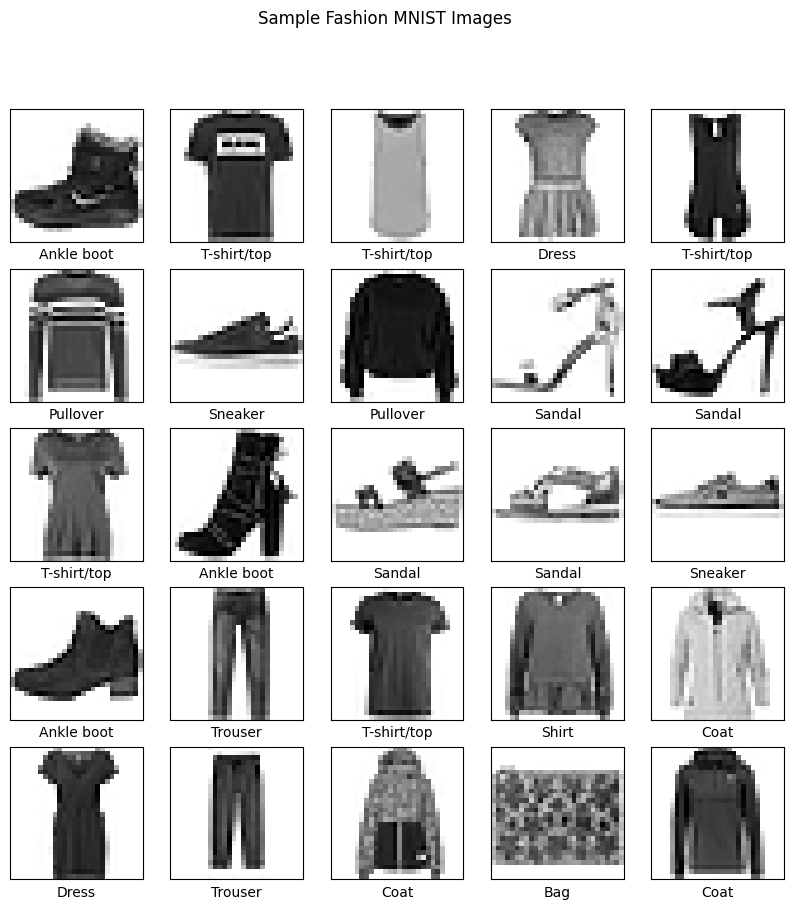

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 25 training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Sample Fashion MNIST Images")
plt.show()

##Build & Train CNN

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7655 - loss: 0.6619 - val_accuracy: 0.8592 - val_loss: 0.3703
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8777 - loss: 0.3352 - val_accuracy: 0.8808 - val_loss: 0.3172
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8976 - loss: 0.2797 - val_accuracy: 0.8935 - val_loss: 0.2780
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9120 - loss: 0.2429 - val_accuracy: 0.9023 - val_loss: 0.2595
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9191 - loss: 0.2180 - val_accuracy: 0.9070 - val_loss: 0.2570


##Evaluate CNN

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9006 - loss: 0.2774
CNN Test Accuracy: 0.9017000198364258


##Train SVM

In [ ]:
svm_model = SVC()
svm_model.fit(x_train_flat, y_train)
svm_preds = svm_model.predict(x_test_flat)
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM Test Accuracy:", svm_acc)

SVM Test Accuracy: 0.8828


##Train Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_flat, y_train)
rf_preds = rf_model.predict(x_test_flat)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Test Accuracy:", rf_acc)

Random Forest Test Accuracy: 0.8761


##Ensemble Learning

In [ ]:
# Get CNN predictions
cnn_preds = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

# Combine predictions
all_preds = np.array([cnn_preds, svm_preds, rf_preds])
ensemble_preds = mode(all_preds, axis=0).mode.squeeze()

# Accuracy
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print("Ensemble Test Accuracy:", ensemble_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Ensemble Test Accuracy: 0.8964


##Plot CNN Training History(optional)

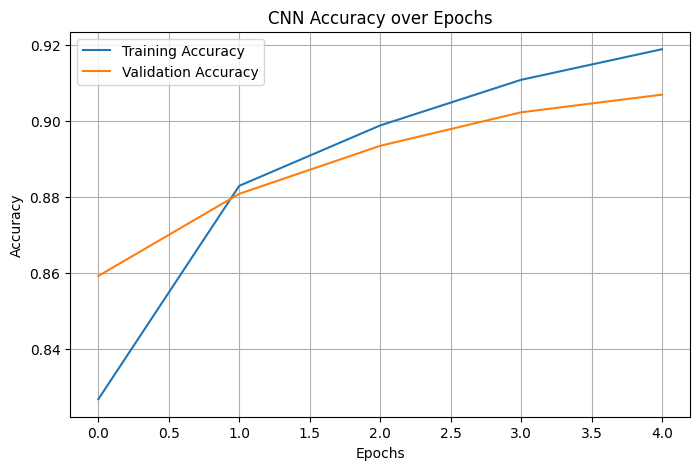

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()
